# Multinomial logistic regression and K means clustering for Cyber Attack Classification 
## Using teamincribo/cyber-security-attacks
### COSC 670
Jamie Cooper

### data import

In [130]:
import kagglehub
import numpy as np
from numpy.linalg import *
import pandas as pd
from math import *
from statistics import *
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import warnings
warnings.filterwarnings('ignore')

FILE_NAME='cybersecurity_attacks.csv'
Y_COL='Attack Type'

# Download latest version
path = kagglehub.dataset_download("teamincribo/cyber-security-attacks")

print("Path to dataset files:", path)


Path to dataset files: C:\Users\jamie\.cache\kagglehub\datasets\teamincribo\cyber-security-attacks\versions\14


### data preview and statistics

In [131]:
file_path = os.path.join(path,FILE_NAME) #get the path to the csv
data = pd.read_csv(file_path)

DATA=data

data.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [133]:
#check unique values in the target column
print(data[Y_COL].value_counts())

Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64


In [134]:
data['Packet Type'].value_counts()

Packet Type
Control    20237
Data       19763
Name: count, dtype: int64

In [135]:
data['Traffic Type'].value_counts()

Traffic Type
DNS     13376
HTTP    13360
FTP     13264
Name: count, dtype: int64

In [136]:
data['Action Taken'].value_counts()

Action Taken
Blocked    13529
Ignored    13276
Logged     13195
Name: count, dtype: int64

In [137]:
data['Protocol'].value_counts()

Protocol
ICMP    13429
UDP     13299
TCP     13272
Name: count, dtype: int64

In [138]:
data['Severity Level'].value_counts()

Severity Level
Medium    13435
High      13382
Low       13183
Name: count, dtype: int64

In [139]:
data['Network Segment'].value_counts()

Network Segment
Segment C    13408
Segment B    13319
Segment A    13273
Name: count, dtype: int64

In [140]:
data['Attack Signature'].value_counts()

Attack Signature
Known Pattern A    20076
Known Pattern B    19924
Name: count, dtype: int64

In [141]:
data['Log Source'].value_counts()

Log Source
Firewall    20116
Server      19884
Name: count, dtype: int64

In [142]:
#summary statistics of numerical columns
data.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


### checking for empty data entries in each column

In [143]:
# Check for missing values
print(data.isnull().sum())

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64


In [144]:
missing_counts = data.isnull().sum()[data.isnull().sum()>0]

missing_percentage = (missing_counts/len(data))*100

#columns for clarity
missing_summary = pd.DataFrame({
    'Column': missing_counts.index,
    'Percentage missing': missing_percentage.values
})
missing_summary

,Column,Percentage missing
0,Malware Indicators,50.0000
1,Alerts/Warnings,50.1675
2,Proxy Information,49.6275
3,Firewall Logs,49.9025
4,IDS/IPS Alerts,50.1250


In [145]:
missing_columns = data.columns[data.isna().any()]
df_missing = data[missing_columns]
data[missing_columns[0]].value_counts()

Malware Indicators
IoC Detected    20000
Name: count, dtype: int64

In [146]:
data[missing_columns[1]].value_counts()

Alerts/Warnings
Alert Triggered    19933
Name: count, dtype: int64

In [147]:
data[missing_columns[2]].value_counts()

Proxy Information
39.123.165.122    2
149.6.110.119     1
192.31.159.5      1
99.149.54.83      1
95.170.137.42     1
                 ..
40.171.118.90     1
153.251.24.124    1
172.194.101.64    1
16.90.191.251     1
114.133.48.179    1
Name: count, Length: 20148, dtype: int64

In [148]:
data[missing_columns[3]].value_counts()

Firewall Logs
Log Data    20039
Name: count, dtype: int64

In [149]:
data[missing_columns[4]].value_counts()

IDS/IPS Alerts
Alert Data    19950
Name: count, dtype: int64

## What do I with all this empty data?
Traditionally, there are two options:

a) drop these columns 

b) impute them with mean or mode calculations for numerical or categorical data, respectively

## 50-50 rule
If the percentage missing is greater than 50, then perhaps these columns aren't that important. Hence, a) seems like the easiest choice.

If the percentage missing is less than 50, then these columns may still hold value. So b) is likely the best choice.

## This data is a bit ... odd
For all nonempty entries, there is only one unique entry, so, for all except `Proxy Information`, I'll label as `True`, if non-empty, and `False`, if empty. As for `Proxy Information`, I am inclined to believe that `NaN` indicates that there is nonesuch information, so I'll replace `NaN` with `0`.

The most important columns, in my opinion, are

1. **Attack Signature**  
   - Directly related to identifying specific attack types using known patterns.
2. **IDS/IPS Alerts**  
   - Alerts from Intrusion Detection/Prevention Systems are often the most indicative of attack types.
3. **Malware Indicators**  
   - Strong signals for identifying specific malware-related attacks.
4. **Traffic Type**  
   - Certain attack types are protocol-specific (e.g., DNS amplification, HTTP-based exploits, FTP attacks).
5. **Action Taken**  
   - Responses to network traffic often correlate with attack severity and type.
6. **Severity Level**  
   - Helps contextualize the nature and criticality of the detected traffic.
7. **Anomaly Scores**  
   - Unusual behaviors in network traffic can help identify stealthy attacks.


### Now some preprocessing

In [150]:
def preprocess(data,missing_columns):

    data=imputation(data,missing_columns)

    top_columns = [
    "Attack Signature",
    "IDS/IPS Alerts",
    "Malware Indicators",
    "Traffic Type",
    "Action Taken",
    "Severity Level",
    "Anomaly Scores",
    Y_COL
    ]

    data = data[top_columns]

    for col in top_columns:

        if col=='Severity Level':
            severity_mapping = {'Low': 0, 'Medium': .5, 'High': 1}
            data['Severity Level']=data['Severity Level'].map(severity_mapping)
        
        elif col!='Anomaly Scores': data=hot_1_encode(data,col)
    
    
    return data.astype(int)

def imputation(data,missing_columns):

    for col in missing_columns:
        data[col]=data[col].notna()

    return data

def hot_1_encode(data,target_col):
    hot_1_data=pd.get_dummies(data,columns=[target_col])
    return hot_1_data

data=preprocess(data,df_missing)
data.isnull().sum()

Severity Level                      0
Anomaly Scores                      0
Attack Signature_Known Pattern A    0
Attack Signature_Known Pattern B    0
IDS/IPS Alerts_False                0
IDS/IPS Alerts_True                 0
Malware Indicators_False            0
Malware Indicators_True             0
Traffic Type_DNS                    0
Traffic Type_FTP                    0
Traffic Type_HTTP                   0
Action Taken_Blocked                0
Action Taken_Ignored                0
Action Taken_Logged                 0
Attack Type_DDoS                    0
Attack Type_Intrusion               0
Attack Type_Malware                 0
dtype: int64

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Severity Level                    40000 non-null  int64
 1   Anomaly Scores                    40000 non-null  int64
 2   Attack Signature_Known Pattern A  40000 non-null  int64
 3   Attack Signature_Known Pattern B  40000 non-null  int64
 4   IDS/IPS Alerts_False              40000 non-null  int64
 5   IDS/IPS Alerts_True               40000 non-null  int64
 6   Malware Indicators_False          40000 non-null  int64
 7   Malware Indicators_True           40000 non-null  int64
 8   Traffic Type_DNS                  40000 non-null  int64
 9   Traffic Type_FTP                  40000 non-null  int64
 10  Traffic Type_HTTP                 40000 non-null  int64
 11  Action Taken_Blocked              40000 non-null  int64
 12  Action Taken_Ignored            

In [152]:
data.describe()

,Severity Level,Anomaly Scores,Attack Signature_Known Pattern A,Attack Signature_Known Pattern B,IDS/IPS Alerts_False,IDS/IPS Alerts_True,Malware Indicators_False,Malware Indicators_True,Traffic Type_DNS,Traffic Type_FTP,Traffic Type_HTTP,Action Taken_Blocked,Action Taken_Ignored,Action Taken_Logged,Attack Type_DDoS,Attack Type_Intrusion,Attack Type_Malware
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000
mean,0.334550,49.618200,0.501900,0.498100,0.501250,0.498750,0.500000,0.500000,0.334400,0.331600,0.334000,0.338225,0.331900,0.329875,0.33570,0.331625,0.332675
std,0.471839,28.854869,0.500003,0.500003,0.500005,0.500005,0.500006,0.500006,0.471786,0.470794,0.471646,0.473111,0.470901,0.470173,0.47224,0.470803,0.471177
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,50.000000,1.000000,0.000000,1.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
max,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [153]:
def split_data(data,split=.8):
    return data.head(int(len(data)*split))

def split_test_train_data(data,size):
    
    ddos_df=data[data[f'{Y_COL}_DDoS']==1].head(size)
    intr_df=data[data[f'{Y_COL}_Intrusion']==1].head(size)
    malw_df=data[data[f'{Y_COL}_Malware']==1].head(size)

    ddos_train=split_data(ddos_df)
    intr_train=split_data(intr_df)
    malw_train=split_data(malw_df)

    ddos_test=ddos_df[len(ddos_train):]
    intr_test=intr_df[len(intr_train):]
    malw_test=malw_df[len(malw_train):]

    train_data=pd.concat([ddos_train,intr_train,malw_train])
    test_data=pd.concat([ddos_test,intr_test,malw_test])

    return train_data,test_data

train_data,test_data=split_test_train_data(data,900)

to_normalize=['Anomaly Scores']
for f in to_normalize:
    test_data[f] = (test_data[f] - train_data[f].mean()) / train_data[f].std()
    train_data[f] = (train_data[f] - train_data[f].mean()) / train_data[f].std()    

train_data.describe()

,Severity Level,Anomaly Scores,Attack Signature_Known Pattern A,Attack Signature_Known Pattern B,IDS/IPS Alerts_False,IDS/IPS Alerts_True,Malware Indicators_False,Malware Indicators_True,Traffic Type_DNS,Traffic Type_FTP,Traffic Type_HTTP,Action Taken_Blocked,Action Taken_Ignored,Action Taken_Logged,Attack Type_DDoS,Attack Type_Intrusion,Attack Type_Malware
count,2160.000000,2.160000e+03,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,0.327778,4.111937e-17,0.493056,0.506944,0.492130,0.507870,0.496759,0.503241,0.333796,0.325463,0.340741,0.336111,0.336111,0.327778,0.333333,0.333333,0.333333
std,0.469512,1.000000e+00,0.500068,0.500068,0.500054,0.500054,0.500105,0.500105,0.471677,0.468656,0.474068,0.472487,0.472487,0.469512,0.471514,0.471514,0.471514
min,0.000000,-1.716945e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-8.868547e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.240972e-02,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,8.770871e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.707177e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [154]:
train_data

,Severity Level,Anomaly Scores,Attack Signature_Known Pattern A,Attack Signature_Known Pattern B,IDS/IPS Alerts_False,IDS/IPS Alerts_True,Malware Indicators_False,Malware Indicators_True,Traffic Type_DNS,Traffic Type_FTP,Traffic Type_HTTP,Action Taken_Blocked,Action Taken_Ignored,Action Taken_Logged,Attack Type_DDoS,Attack Type_Intrusion,Attack Type_Malware
2,0,1.292132,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
4,0,-1.716945,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0
6,1,-0.644745,0,1,1,0,1,0,1,0,0,0,1,0,1,0,0
16,1,-0.229700,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0
17,0,-0.333461,1,0,0,1,1,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,0,1.292132,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
2165,0,-0.333461,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1
2168,0,-0.056764,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1
2171,1,-1.059790,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1


In [155]:
def load_data(data):
    Y_COLS=[f'{Y_COL}_DDoS',f'{Y_COL}_Intrusion',f'{Y_COL}_Malware']
    X=data.drop(columns=Y_COLS)
    y=data[Y_COLS]
    return X,y

X_train,y_train=load_data(train_data)
X_test,y_test=load_data(test_data)
X_test

,Severity Level,Anomaly Scores,Attack Signature_Known Pattern A,Attack Signature_Known Pattern B,IDS/IPS Alerts_False,IDS/IPS Alerts_True,Malware Indicators_False,Malware Indicators_True,Traffic Type_DNS,Traffic Type_FTP,Traffic Type_HTTP,Action Taken_Blocked,Action Taken_Ignored,Action Taken_Logged
2136,0,0.427455,0,1,0,1,1,0,0,0,1,1,0,0
2138,0,-0.333461,0,1,1,0,1,0,1,0,0,0,0,1
2141,1,0.012410,1,0,1,0,0,1,0,0,1,1,0,0
2146,1,1.395893,0,1,1,0,1,0,0,1,0,0,0,1
2155,0,-1.405661,1,0,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,0,-1.613184,0,1,1,0,1,0,1,0,0,1,0,0
2659,0,-0.575571,1,0,1,0,0,1,0,1,0,1,0,0
2666,0,-1.371074,1,0,1,0,0,1,1,0,0,0,1,0
2674,0,0.842500,0,1,1,0,0,1,0,0,1,0,1,0


In [156]:
y_test

,Attack Type_DDoS,Attack Type_Intrusion,Attack Type_Malware
2136,1,0,0
2138,1,0,0
2141,1,0,0
2146,1,0,0
2155,1,0,0
...,...,...,...
2657,0,0,1
2659,0,0,1
2666,0,0,1
2674,0,0,1


In [157]:
def sigmoid(z):
    z=np.clip(z, -20, 20)
    return 1/(1+np.exp(-z))

def softmax(z):
    exp_z=np.exp(z-np.max(z,axis=1,keepdims=True))
    return exp_z/np.sum(exp_z,axis=1,keepdims=True)

def h(theta,x):
    return np.dot(x,theta)

def P(theta,x):
    return softmax(h(theta,x))

def cost_function(theta,x,y):
    m=len(y)
    epsilon = 1e-10  # To avoid log(0)
    return -(1/m)*np.sum(y*np.log(P(theta,x)+epsilon)+(1-y)*np.log(1-P(theta,x)+epsilon))

def gradient(theta,x,y):
    m=len(y)
    return (1/m)*np.dot(x.T,(sigmoid(h(theta,x))-y))

# gradient descent algorithm
# parameters: x, y, alpha, epsilon
# x: data used in the prediction
# y: data to be predicted along the y-axis
# alpha: learning rate
# epsilon: convergence threshold
# return: costs, theta, tt
# costs: list of all cost values
# theta: final theta value
# tt: total execution time
def grad_descent(x,y,alpha,epsilon):
    st=time.time()
    
    n,m = x.shape[1],y.shape[1]
    theta = np.zeros((n,m))
    costs=[]
    diff=np.ones_like(theta) #list of differences to compare with epsilon

    converge=norm(diff)<epsilon
    max_iter=150000
    iter_count=0

    while not converge and iter_count<max_iter:
        iter_count+=1

        cost=cost_function(theta,x,y)
        costs.append(cost)

        new_theta=theta-alpha*gradient(theta,x,y)
        
        diff=abs(new_theta - theta)
        converge=norm(diff) < epsilon

        theta=new_theta
        
    et=time.time()
    tt=et-st
    prob=np.round(P(theta,x),6)
    return costs,theta,tt,prob


def log_reg(x,y):
    y=y.to_numpy()
    x=np.insert(x.to_numpy(),0,1,axis=1) #inserting 1 for x_0
    
    costs,theta,t,prob=grad_descent(x,y,.2,10**-5)
    return theta,prob

def eq_lin_reg(x,y,regular=0):
    x=np.insert(x,0,1,axis=1) #inserting 1 for x_0
    theta=normaleq(x,y,regular)
    return theta

def normaleq(x,y,regular):
    A=regular*np.identity(x.shape[1])
    A[0,0]=0
    theta=(inv(x.T.dot(x)+A)).dot(x.T.dot(y))
    return theta

In [158]:
theta,train_prob=log_reg(X_train,y_train)
theta

array([[-2.19512807e-01, -2.23540061e-01, -2.16956283e-01],
       [-7.30279245e-03,  4.11027050e-02, -3.57785030e-02],
       [-7.19987322e-02, -1.50812523e-02,  8.72242919e-02],
       [-1.67665594e-01, -7.45826664e-02, -8.80838482e-02],
       [-5.18472135e-02, -1.48957395e-01, -1.28872435e-01],
       [-8.46471027e-02, -8.43210298e-02, -1.61257650e-01],
       [-1.34865705e-01, -1.39219032e-01, -5.56986334e-02],
       [-1.16408430e-01,  2.82727306e-03, -2.16746387e-01],
       [-1.03104378e-01, -2.26367335e-01, -2.09896564e-04],
       [-7.67534202e-02, -4.15250995e-02, -1.01848918e-01],
       [-8.33908725e-02, -1.08181162e-01, -2.84807373e-02],
       [-5.93685147e-02, -7.38337995e-02, -8.66266277e-02],
       [-1.21130020e-01, -8.04273363e-02, -1.64590680e-02],
       [ 5.88592022e-02, -7.48756701e-02, -2.07423951e-01],
       [-1.57241990e-01, -6.82370550e-02,  6.92673540e-03]])

In [159]:
#theta=eq_lin_reg(X_train,y_train,regular=1e-4)
theta.shape

(15, 3)

In [160]:
def predict(theta,x):
    x=np.insert(x.to_numpy(),0,1,axis=1)
    prob=P(theta,x)
    return prob

test_prob=predict(theta,X_test)

print(train_prob.shape,test_prob.shape)
np.round(test_prob[:10])
train_prob

(2160, 3) (540, 3)


array([[0.362544, 0.267665, 0.36979 ],
       [0.364875, 0.36195 , 0.273175],
       [0.40923 , 0.382185, 0.208585],
       ...,
       [0.275522, 0.28177 , 0.442707],
       [0.308968, 0.425886, 0.265146],
       [0.443696, 0.276017, 0.280287]])

In [161]:
def multi_class_prediction(arg_pred):
    predicted_values=[]
    for x in arg_pred:
        if x==0:
            predicted_values.append('DDoS')
        if x==1:
            predicted_values.append('Intrusion')
        if x==2:
            predicted_values.append('Malware')
    return np.array(predicted_values)

def generate_classification_matrix(actual_values,predicted_values):
    zeros=(0,0,0)
    t0,t1,t2=zeros, f01,f02=zeros, f10,f12=zeros, f20,f21=zeros
    
    m=len(actual_values)

    for actual_value, predicted_value in zip(actual_values, predicted_values):
    # true (t) or false prediction (f)
        if predicted_value == actual_value: # t?
            if predicted_value == 0: # tp
                t0 += 1
            if predicted_value == 1:
                t1+=1
            if predicted_value == 2:
                t2+=1
        elif predicted_value!=actual_value:
            if actual_value==0:
                if predicted_value == 1:
                    f01+=1
                if predicted_value == 2:
                    f02+=1
            if actual_value==1:
                if predicted_value==0:
                    f10+=1
                if predicted_value==2:
                    f12+=1
            if actual_value==2:
                if predicted_value==0:
                    f20+=1
                if predicted_value==1:
                    f21+=1
            
    confusion_matrix = np.array([
        [t0, f10, f20],
        [f01, t1, f21],
        [f02, f12, t2],
    ])
    
    row_tot=np.sum(confusion_matrix,axis=1)
    row_tot=row_tot.reshape(3,1)
    confusion_matrix=np.append(confusion_matrix, row_tot, axis=1)
    
    column_tot=np.sum(confusion_matrix,axis=0)
    
    i=confusion_matrix.shape[0]
    confusion_matrix=np.insert(confusion_matrix,i,column_tot,axis=0)
    
    class_matrix=pd.DataFrame(confusion_matrix, index=['DDoS','Intrusion','Malware','total'],
                   columns=['Predicted DDoS','Predicted Intrusion','Predicted Malware','total'],)
    print(class_matrix)

    overall_per_correct=(class_matrix.iat[0,0]+class_matrix.iat[1,1]+class_matrix.iat[2,2])/class_matrix.iat[3,3]
    ddos_per_correct=class_matrix.iat[0,0]/class_matrix.iat[3,0]
    intr_per_correct=class_matrix.iat[1,1]/class_matrix.iat[3,1]
    malw_per_correct=class_matrix.iat[2,2]/class_matrix.iat[3,2]

    print('\noverall ratio of correct classification:',np.round(overall_per_correct,6))
    print('DDoS ratio of correct classification:',np.round(ddos_per_correct,6))
    print('Intrustion ratio of correct classification:',np.round(intr_per_correct,6))
    print('Malware ratio of correct classification',np.round(malw_per_correct,6))

print('train results')
train_arg_predict=np.argmax(train_prob,axis=1)
predicted_train_values=multi_class_prediction(train_arg_predict)
train_arg_actual=np.argmax(y_train.to_numpy(),axis=1)
actual_train_values=multi_class_prediction(train_arg_actual)

generate_classification_matrix(train_arg_actual,train_arg_predict)

print('\ntest results')
test_arg_predict=np.argmax(test_prob,axis=1)
predicted_test_values=multi_class_prediction(test_arg_predict)
test_arg_actual=np.argmax(y_test.to_numpy(),axis=1)
actual_test_values=multi_class_prediction(test_arg_actual)

#fdf=pd.DataFrame({'Prediction':predicted_test_values,'Actual':actual_test_values})
#print('test data:\n\n',fdf.to_string()) #this would show all predictions and actual values
generate_classification_matrix(test_arg_actual,test_arg_predict)

train results
           Predicted DDoS  Predicted Intrusion  Predicted Malware  total
DDoS                  216                  203                199    618
Intrusion             251                  272                225    748
Malware               253                  245                296    794
total                 720                  720                720   2160

overall ratio of correct classification: 0.362963
DDoS ratio of correct classification: 0.3
Intrustion ratio of correct classification: 0.377778
Malware ratio of correct classification 0.411111

test results
           Predicted DDoS  Predicted Intrusion  Predicted Malware  total
DDoS                   47                   56                 41    144
Intrusion              75                   64                 61    200
Malware                58                   60                 78    196
total                 180                  180                180    540

overall ratio of correct classification: 0.35


### Some principal components Analysis

In [162]:
def PCA(x_n,c):
    covariance_matrix=np.cov(x_n,rowvar=False)
    evalues,evectors=np.linalg.eigh(covariance_matrix)
    u_index=np.argsort(evalues)[::-1]
    un_evalues=evalues[u_index]
    un_evectors=evectors[:,u_index]
    
    uk_evectors=un_evectors[:,0:c]

    x_k=np.dot(x_n,uk_evectors)
    return x_k,uk_evectors,un_evalues

X_train_2,u_2,u_n=PCA(X_train,2)
print('the matrix of the first 2 principal components:\n',u_2)

the matrix of the first 2 principal components:
 [[ 3.39068217e-03 -4.14587880e-03]
 [ 9.98669188e-01 -3.56548902e-02]
 [-1.54791977e-02 -3.59642322e-01]
 [ 1.54791977e-02  3.59642322e-01]
 [ 2.37110548e-02  5.15537948e-01]
 [-2.37110548e-02 -5.15537948e-01]
 [ 4.41242958e-04  3.10178266e-01]
 [-4.41242958e-04 -3.10178266e-01]
 [ 2.33402415e-02  7.26977901e-03]
 [-9.33418288e-03  5.51294053e-02]
 [-1.40060586e-02 -6.23991843e-02]
 [ 7.52469196e-03 -7.73268319e-02]
 [-1.18658366e-02  3.18973689e-02]
 [ 4.34114468e-03  4.54294630e-02]]


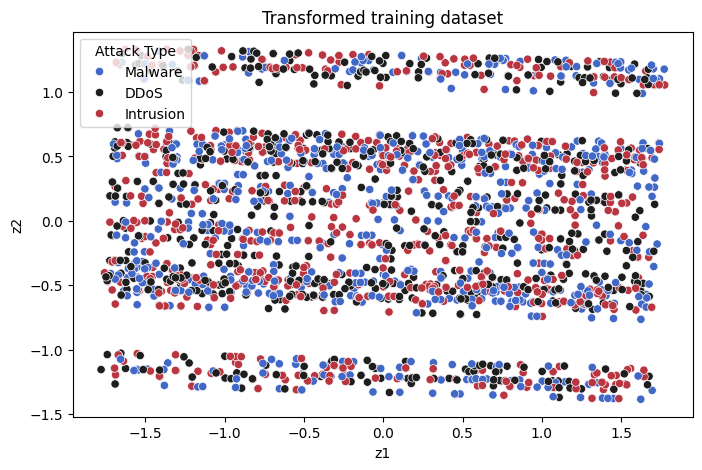

In [163]:
train_PCA_df=pd.DataFrame(X_train_2,columns=['z1','z2'])
DATA_X=DATA[:len(X_train)]
train_PCA_df=pd.concat([train_PCA_df,DATA_X['Attack Type'].reset_index(drop=True)],axis=1)
plt.figure(figsize = (8,5))
sns.scatterplot(data=train_PCA_df,x='z1',y='z2',hue='Attack Type',palette='icefire')
plt.title('Transformed training dataset')
plt.show()

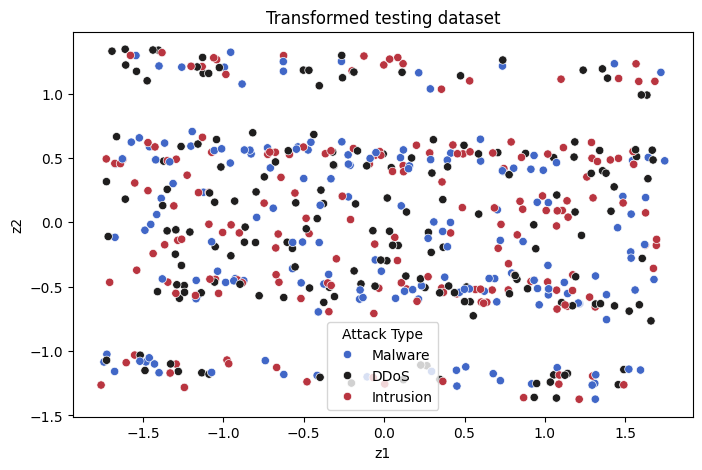

In [164]:
X_test_k=np.dot(X_test,u_2)
test_PCA_df=pd.DataFrame(X_test_k,columns=['z1','z2'])
DATA_X=DATA[:len(X_train)]
test_PCA_df=pd.concat([test_PCA_df,DATA_X['Attack Type'].reset_index(drop=True)],axis=1)
plt.figure(figsize = (8,5))
sns.scatterplot(data=test_PCA_df,x='z1',y='z2',hue='Attack Type',palette='icefire')
plt.title('Transformed testing dataset')
plt.show()

In [165]:
def PCA(x_n,c):
    covariance_matrix=np.cov(x_n,rowvar=False)
    evalues,evectors=np.linalg.eigh(covariance_matrix)
    u_index=np.argsort(evalues)[::-1]
    un_evalues=evalues[u_index]
    un_evectors=evectors[:,u_index]
    
    uk_evectors=un_evectors[:,0:c]

    x_k=np.dot(x_n,uk_evectors)
    return x_k,uk_evectors,un_evalues

X_train_3,u_3,u_n=PCA(X_train,3)
print('the matrix of the first 3 principal components:\n',u_3)

the matrix of the first 3 principal components:
 [[ 3.39068217e-03 -4.14587880e-03 -1.51571562e-02]
 [ 9.98669188e-01 -3.56548902e-02  1.24267430e-02]
 [-1.54791977e-02 -3.59642322e-01  5.07227872e-01]
 [ 1.54791977e-02  3.59642322e-01 -5.07227872e-01]
 [ 2.37110548e-02  5.15537948e-01  6.83553598e-02]
 [-2.37110548e-02 -5.15537948e-01 -6.83553598e-02]
 [ 4.41242958e-04  3.10178266e-01  4.82778317e-01]
 [-4.41242958e-04 -3.10178266e-01 -4.82778317e-01]
 [ 2.33402415e-02  7.26977901e-03 -3.41846021e-02]
 [-9.33418288e-03  5.51294053e-02  4.39938339e-02]
 [-1.40060586e-02 -6.23991843e-02 -9.80923180e-03]
 [ 7.52469196e-03 -7.73268319e-02  6.51121475e-02]
 [-1.18658366e-02  3.18973689e-02 -3.33433679e-02]
 [ 4.34114468e-03  4.54294630e-02 -3.17687796e-02]]


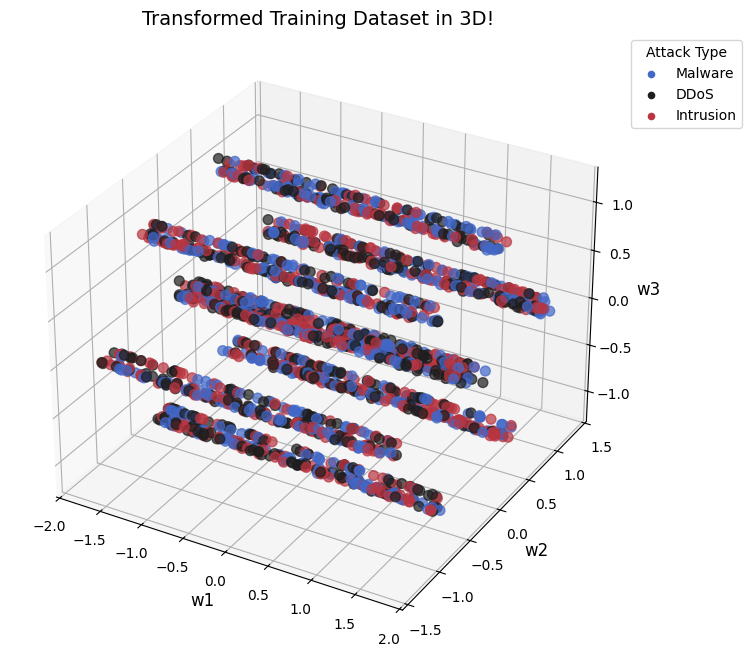

In [166]:
from mpl_toolkits.mplot3d import Axes3D

train_PCA_df=pd.DataFrame(X_train_3,columns=['w1','w2','w3'])
DATA_X=DATA[:len(X_train)]
train_PCA_df=pd.concat([train_PCA_df,DATA_X['Attack Type'].reset_index(drop=True)],axis=1)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Use a Seaborn color palette
palette = sns.color_palette("icefire", n_colors=train_PCA_df['Attack Type'].nunique())
attack_type_colors = dict(zip(train_PCA_df['Attack Type'].unique(), palette))
colors = train_PCA_df['Attack Type'].map(attack_type_colors)

# Create 3D scatter plot
scatter = ax.scatter(
    train_PCA_df['w1'], train_PCA_df['w2'], train_PCA_df['w3'],
    c=colors, s=50, alpha=0.7
)

# Customize plot
ax.set_title('Transformed Training Dataset in 3D!', fontsize=14)
ax.set_xlabel('w1', fontsize=12)
ax.set_ylabel('w2', fontsize=12)
ax.set_zlabel('w3', fontsize=12)

# Add a legend for the colors
for attack_type, color in attack_type_colors.items():
    ax.scatter([], [], [], label=attack_type, color=color)

ax.legend(title="Attack Type", loc='upper right', bbox_to_anchor=(1.2, 1))

# Show plot
plt.show()

# ¯\\\_(ツ)_/¯

While we're here, let's do K means clustering

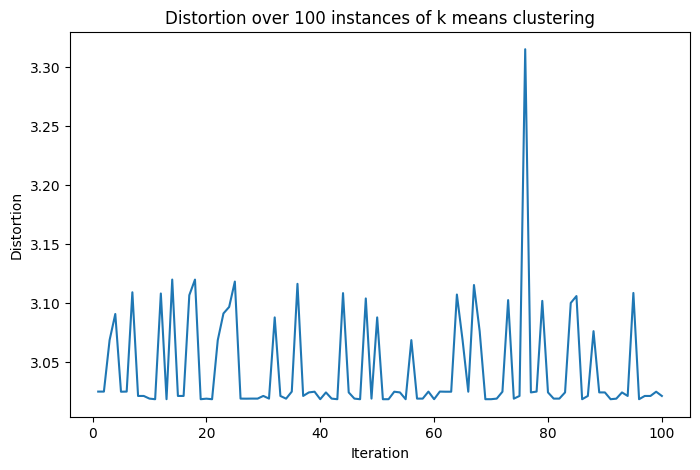

In [167]:
from random import *

def init_centroids(data,k):
    indices=sample(range(len(data)),k)
    centroids=[data[i] for i in indices]
    return np.array(centroids)

def assign_cluster(x,centroids):
    assignments=[]
    for xi in x:
        dist_point_clust=[]
        for centroid in centroids:
            d_clust=np.linalg.norm(xi-centroid)
            dist_point_clust.append(d_clust)
    
        assignment=np.argmin(dist_point_clust)
        assignments.append(assignment)
    return assignments

def new_centroids(x,centroids,assignments,k):
    new_centroids=[]
    for i in range(k):
        pt_cluster=[]
        for j in range(len(x)):
                if(assignments[j]==i):
                    pt_cluster.append(x[j])
        mean_c=np.mean(pt_cluster, axis=0)
        new_centroids.append(mean_c)
    return np.array(new_centroids)

def sse(x, assignments, centroids):
    errors=[]
    m=len(x)
    for i in range(m):
        centroid=centroids[assignments[i]]
        error=(np.linalg.norm(x[i]-centroid))**2
        errors.append(error)
    sse=(1/m)*sum(errors)
    return sse

def kmeans_clustering(x,k):
    assignments=[]
    centroids=init_centroids(x,k)
    all_centroids=np.array([centroids])
    assignments=assign_cluster(x,centroids)
    
    converge=False
    while(not converge):
        centroids=new_centroids(x,centroids,assignments,k)
        assignments=assign_cluster(x,centroids)

        all_centroids=np.append(all_centroids,np.array([centroids]),axis=0)
        converge=(all_centroids[-1]==all_centroids[-2]).all()
        
    distortion=sse(x,assignments,centroids)
        
    return centroids,assignments,distortion

def remedy(x,k,it):
    all_centroids=np.zeros((it,k,x.shape[1]))
    all_distortions=np.array([None]*it)
    all_assignments=np.zeros((it,x.shape[0]))
    for i in range(it):
        centroids,assignments,distortion=kmeans_clustering(x,k)
        all_centroids[i]=centroids
        all_distortions[i]=distortion
        all_assignments[i]=assignments
        
    return all_centroids,all_assignments,all_distortions

def plot_distortion(dist,k,size):
    fig = plt.figure(figsize = (8, 5))
    plt.plot(list(range(1,size+1)),dist,linestyle="-")
    plt.xlabel('Iteration')
    plt.ylabel('Distortion')
    plt.title('Distortion over 100 instances of k means clustering')
    plt.show()
    
ITER=100
K=3
all_centroids,all_assignments,all_distortions=remedy(X_train.to_numpy(),K,ITER)

plot_distortion(all_distortions,K,ITER)

In [168]:
j=np.argmin(all_distortions)
print('the centroids with the least distortion after k means clustering are\n',all_centroids[j],
      'with a distortion of',all_distortions[j])
print('this corresponds to iteration number',j+1)

the centroids with the least distortion after k means clustering are
 [[ 0.32747253 -1.00836565  0.48131868  0.51868132  0.48351648  0.51648352
   0.4978022   0.5021978   0.31758242  0.32747253  0.35494505  0.33296703
   0.34945055  0.31758242]
 [ 0.33065811  0.77493578  0.          1.          0.53130016  0.46869984
   0.50722311  0.49277689  0.35313002  0.31460674  0.33226324  0.2953451
   0.34028892  0.36436597]
 [ 0.32535885  0.69350517  1.          0.          0.46570973  0.53429027
   0.48484848  0.51515152  0.33811802  0.33333333  0.32854864  0.38118022
   0.31259968  0.3062201 ]] with a distortion of 3.0182567822116733
this corresponds to iteration number 51


In [169]:
def response_vs_cluster_assignment_matrix(assignments,response):
    zeros=(0,0,0)
    t0,t1,t2=zeros, f01,f02=zeros, f10,f12=zeros, f20,f21=zeros
    m=len(response)

    for actual_value, predicted_value in zip(list(response),list(assignments)):
        if predicted_value == actual_value: # t?
            if predicted_value == 0: # tp
                t0 += 1
            if predicted_value == 1:
                t1+=1
            if predicted_value == 2:
                t2+=1
        elif predicted_value!=actual_value:
            if actual_value==0:
                if predicted_value == 1:
                    f01+=1
                if predicted_value == 2:
                    f02+=1
            if actual_value==1:
                if predicted_value==0:
                    f10+=1
                if predicted_value==2:
                    f12+=1
            if actual_value==2:
                if predicted_value==0:
                    f20+=1
                if predicted_value==1:
                    f21+=1
            
    confusion_matrix = np.array([
        [t0, f10, f20],
        [f01, t1, f21],
        [f02, f12, t2],
    ]).T
    
    row_tot=np.sum(confusion_matrix,axis=1)
    row_tot=row_tot.reshape(3,1)
    confusion_matrix=np.append(confusion_matrix, row_tot, axis=1)
    
    column_tot=np.sum(confusion_matrix,axis=0)
    
    i=confusion_matrix.shape[0]
    confusion_matrix=np.insert(confusion_matrix,i,column_tot,axis=0)
    
    class_matrix=pd.DataFrame(confusion_matrix, index=['DDoS','Intrusion','Malware','total'],
                   columns=['cluster 0', 'cluster 1','cluster 2', 'total'])
    print(class_matrix)

np_train_pred=np.argmax(y_train.to_numpy(),axis=1)
train_assignments=all_assignments[j]
response_vs_cluster_assignment_matrix(train_assignments,np_train_pred)

           cluster 0  cluster 1  cluster 2  total
DDoS             323        207        190    720
Intrusion        300        212        208    720
Malware          287        204        229    720
total            910        623        627   2160


In [170]:
np_test_data_y=y_test.to_numpy()
np_test_pred=np.argmax(np_test_data_y,axis=1)
test_assignments=assign_cluster(X_test.to_numpy(),all_centroids[j])

response_vs_cluster_assignment_matrix(test_assignments,np_test_pred)

           cluster 0  cluster 1  cluster 2  total
DDoS              75         50         55    180
Intrusion         87         44         49    180
Malware           72         51         57    180
total            234        145        161    540
